# Library import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import math
from tqdm import tqdm
from scipy.stats import chi2

from PIL import Image
import os

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.preprocessing import StandardScaler


In [3]:
from sklearn.decomposition import PCA

In [5]:
os.chdir("..")

In [6]:
from safeml.DistanceMetricsVec import ES_Dist

# Model building

In [7]:
# Reading the input images and putting them into a numpy array
data=[]
labels=[]

height = 30
width = 30
channels = 3

n_inputs = height * width*channels

ClassFolders = os.listdir("Final_Training/Images")
classes = len(ClassFolders)

for idx, fileName in enumerate(ClassFolders) :
    path = os.path.join("Final_Training/Images", fileName)
    #path = "C:/cmder/Python_Tests/GTSRB/Train/{0}/".format(i)
    print(path)
    classImges = os.listdir(path)
    for img in classImges:
        try:
            image=cv2.imread(os.path.join(path, img))
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(idx)
        except AttributeError:
            print(os.path.join(path, img) + " is not an image")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

Final_Training/Images\00001
Final_Training/Images\00001\GT-00001.csv is not an image
Final_Training/Images\00002
Final_Training/Images\00002\GT-00002.csv is not an image
Final_Training/Images\00003
Final_Training/Images\00003\GT-00003.csv is not an image
Final_Training/Images\00004
Final_Training/Images\00004\GT-00004.csv is not an image
Final_Training/Images\00005
Final_Training/Images\00005\GT-00005.csv is not an image
Final_Training/Images\00006
Final_Training/Images\00006\GT-00006.csv is not an image
Final_Training/Images\00007
Final_Training/Images\00007\GT-00007.csv is not an image
Final_Training/Images\00008
Final_Training/Images\00008\GT-00008.csv is not an image
Final_Training/Images\00009
Final_Training/Images\00009\GT-00009.csv is not an image
Final_Training/Images\00010
Final_Training/Images\00010\GT-00010.csv is not an image
Final_Training/Images\00011
Final_Training/Images\00011\GT-00011.csv is not an image
Final_Training/Images\00012
Final_Training/Images\00012\GT-00012.

In [8]:
X_train, X_val, y_train, y_val = train_test_split(Cells, labels, test_size=0.30, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42, stratify=y_val)

In [9]:
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [10]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(26314, 30, 30, 3) (5639, 30, 30, 3) (5639, 30, 30, 3)
(26314,) (5639,) (5639,)


In [11]:
X_train = X_train[y_train != 0]
X_val = X_val[y_val != 0]

y_train = y_train[y_train != 0]
y_val = y_val[y_val != 0]



In [12]:
y_train = keras.utils.to_categorical(y_train, classes)
y_val = keras.utils.to_categorical(y_val, classes)
y_test = keras.utils.to_categorical(y_test, classes)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(25745, 30, 30, 3) (5517, 30, 30, 3) (5639, 30, 30, 3)
(25745, 42) (5517, 42) (5639, 42)


In [14]:
def build_model(input_shape, num_features, num_labels):

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(num_features, activation='relu'))
    model.add(Dense(num_labels, activation='softmax'))

    return model

def compile_model(model, lr, loss='categorical_crossentropy', optimizer='adam', acc_metric = "accuracy"):
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr) 
    model.compile(loss=loss, optimizer=optimizer, metrics=[acc_metric])
    
    return model

In [15]:
lr = .001
max_epochs = 50
patience = 3
batch_size = 128
input_shape =X_train.shape[1:]
num_features = 100
num_labels = classes

In [16]:
model = build_model(input_shape, num_features, num_labels)
model = compile_model(model, lr)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)                    
history = model.fit(X_train, y_train, epochs=max_epochs, batch_size=batch_size, validation_data=(X_val, y_val),
                            shuffle=False, callbacks=[callback])

Epoch 1/50
202/202 [==============================] - 20s 95ms/step - loss: 2.1083 - accuracy: 0.4229 - val_loss: 0.5269 - val_accuracy: 0.8688
Epoch 2/50
202/202 [==============================] - 20s 97ms/step - loss: 0.5314 - accuracy: 0.8334 - val_loss: 0.1624 - val_accuracy: 0.9572
Epoch 3/50
202/202 [==============================] - 19s 95ms/step - loss: 0.2828 - accuracy: 0.9142 - val_loss: 0.0846 - val_accuracy: 0.9784
Epoch 4/50
202/202 [==============================] - 19s 94ms/step - loss: 0.1864 - accuracy: 0.9427 - val_loss: 0.0603 - val_accuracy: 0.9844
Epoch 5/50
202/202 [==============================] - 19s 94ms/step - loss: 0.1389 - accuracy: 0.9565 - val_loss: 0.0513 - val_accuracy: 0.9855
Epoch 6/50
202/202 [==============================] - 19s 94ms/step - loss: 0.1147 - accuracy: 0.9633 - val_loss: 0.0395 - val_accuracy: 0.9917
Epoch 7/50
202/202 [==============================] - 19s 95ms/step - loss: 0.0910 - accuracy: 0.9717 - val_loss: 0.0304 - val_accuracy:

In [18]:
accr = model.evaluate(X_test, y_test)
print(accr)

177/177 [==============================] - 1s 7ms/step - loss: 1.0668 - accuracy: 0.9738
[1.0668376684188843, 0.9737542271614075]


# Distance Measure Evaluation

In [19]:
y_pred = np.argmax(model.predict(X_test), 1)
y_real = np.argmax(y_test, 1)

177/177 [==============================] - 1s 7ms/step


In [20]:
mask = np.zeros(len(y_pred))
for idx, yp in enumerate(y_pred):
    mask[idx] = yp == y_real[idx]
    
print(mask)

[1. 1. 1. ... 1. 0. 1.]


In [21]:
print(len(mask) - mask.sum() )

148.0


In [22]:
def create_filter(model):
    
    x = model.layers[-2].output
    output = Model(inputs = model.input, outputs= x)
    
    return output

In [23]:
filter_model = create_filter(model)

In [24]:
filtered_train = filter_model.predict(X_train)
filtered_test = filter_model.predict(X_test)

177/177 [==============================] - 1s 7ms/step


In [25]:
pca = PCA(n_components=15)
train_components = pca.fit_transform(filtered_train)
print(pca.explained_variance_)

[362.02887  231.05118  206.50307  149.62177  120.668175  95.74541
  88.0245    69.46353   60.787663  51.181606  46.70602   33.896313
  32.8189    24.43839   19.679035]


In [26]:
explained = pca.explained_variance_ratio_
explained = [sum(explained[:x]) for x in range(1,len(explained))]

print(explained)

[0.21136696636676788, 0.34626391530036926, 0.46682868897914886, 0.5541838780045509, 0.6246347948908806, 0.680534802377224, 0.7319270335137844, 0.7724826298654079, 0.8079729042947292, 0.837854778394103, 0.865123625844717, 0.8849136531352997, 0.9040746428072453, 0.918342755176127]


Text(0.5, 0, 'component number')

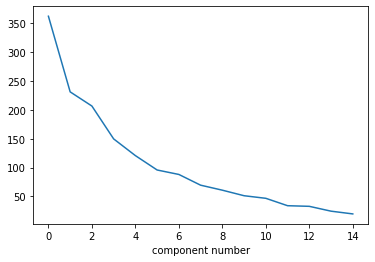

In [27]:
fig, ax1 = plt.subplots()
plt.plot(pca.explained_variance_)


plt.xlabel('component number')

In [28]:
test_components = pca.transform(filtered_test)

In [29]:
test_correct = test_components[mask == 1, :10]
test_incorrect = test_components[mask ==0, :10]

print(test_correct.shape, test_incorrect.shape)

(5491, 10) (148, 10)


In [30]:
train_samplespace = train_components[:, :10]
print(train_samplespace.shape)

(25745, 10)


# Epps Singlton Test

In [33]:
def get_es_distance(train_set, test_set):
    #return statistical distance measures
    if (train_set.shape[1] != test_set.shape[1]):
        print(f"input features are not compatible. input one size {train_set.shape[1]} does not match input two size {test_set.shape[1]}")
        return None
    else:
        input_features = train_set.shape[1]
        
    input_features = train_set.shape[1]
    
    w2 = np.zeros(input_features)
    p_val = np.zeros(input_features)


    for i in range(input_features):
        
        w2[i], p_val[i] = ES_Dist(train_set[:, i], test_set[:, i])
        
        
    return (w2, p_val)

## Distance vs Samples Number

In [34]:
value_range = range(5, 101, 5)
trails = 200
alpha = 0.1

correct  = np.zeros((len(value_range)))
incorrect  = np.zeros((len(value_range)))



for idx, smp_n in (enumerate(value_range)):
    

    idx_train = np.random.choice(train_samplespace.shape[0], smp_n, replace=False)
    idx_correct = np.random.choice(test_correct.shape[0], smp_n, replace=False)
    idx_incorrect = np.random.choice(test_incorrect.shape[0], smp_n, replace=False)

    dist_correct, p_correct = get_es_distance(train_samplespace[idx_train], test_correct[idx_correct])
    dist_incorrect, p_incorrect = get_es_distance(train_samplespace[idx_train], test_incorrect[idx_incorrect])


    correct[idx] = dist_correct.mean()
    incorrect[idx] = dist_incorrect.mean()


      

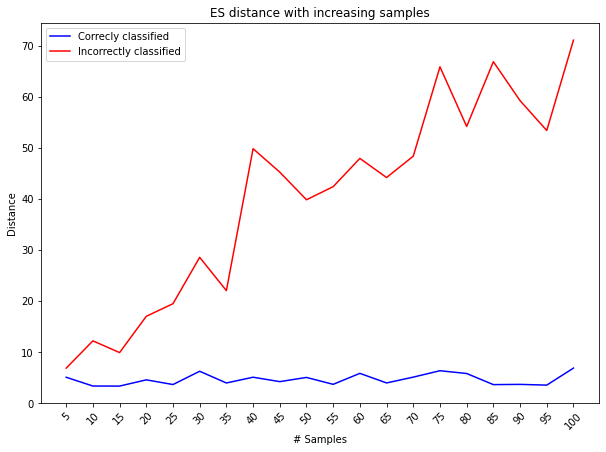

In [40]:
fig=plt.figure(figsize=[10,7])
y1, y2 = correct, incorrect
#print(y1, y2)

plt.plot(y1, 'b')
plt.plot(y2, 'r')
plt.xticks(range(20), range(5, 101, 5), rotation = 45)

plt.title("ES distance with increasing samples")
plt.legend(["Correcly classified", "Incorrectly classified"], loc = 2)
plt.ylabel("Distance")
plt.xlabel("# Samples")

plt.show()

# ES Bootstrap Power Analysis

In [43]:
value_range = range(5, 101, 5)
trails = 100
alpha = 0.1

false_positive_mean  = np.zeros((len(value_range)))
false_negative_mean  = np.zeros((len(value_range)))

for idx, smp_n in (enumerate(value_range)):
    
    for sim_number in range(trails):

        idx_train = np.random.choice(train_samplespace.shape[0], smp_n, replace=False)
        idx_correct = np.random.choice(test_correct.shape[0], smp_n, replace=False)
        idx_incorrect = np.random.choice(test_incorrect.shape[0], smp_n, replace=False)

        dist_correct, p_correct = get_es_distance(train_samplespace[idx_train], test_correct[idx_correct])
        dist_incorrect, p_incorrect = get_es_distance(train_samplespace[idx_train], test_incorrect[idx_incorrect])
    

        false_positive_mean[idx] += 1 if p_incorrect.mean() > alpha else 0
        false_negative_mean[idx] += 1 if p_correct.mean() < alpha else 0
        

            

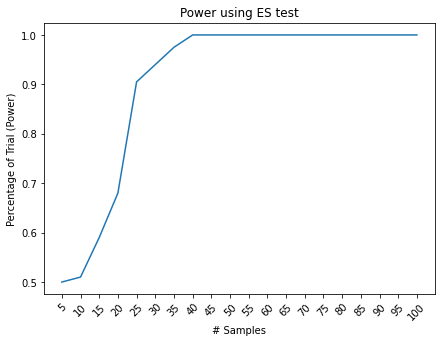

In [63]:
fig=plt.figure(figsize=[7,5])


power_mean = (2*trails - false_positive_mean - false_negative_mean)/(2*trails)


plt.plot(power_mean)

plt.xticks(range(20), range(5, 101, 5), rotation = 45)
title_str = "Power using ES test"
plt.title(title_str)
plt.ylabel("Percentage of Trial (Power)")
plt.xlabel("# Samples")

plt.show()

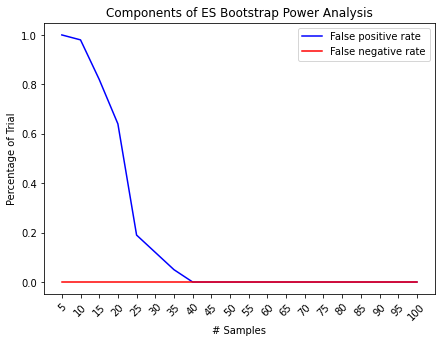

In [62]:
fig=plt.figure(figsize=[7,5])
y1, y2 = false_positive_mean/trails, false_negative_mean/trails
#print(y1, y2)

plt.plot(y1, 'b')
plt.plot(y2, 'r')
plt.xticks(range(20), range(5, 101, 5), rotation = 45)

plt.title("Components of ES Bootstrap Power Analysis")
plt.legend(["False positive rate", "False negative rate"], loc = 1)
plt.ylabel("Percentage of Trial")
plt.xlabel("# Samples")

plt.show()